# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [54]:
import pandas as pd
import numpy as np
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

# import data
X = pd.read_csv('C:/Users/erinp/Desktop/mlnn/data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

lat        lon        alt
263265   8.965058  56.828110   1.482761
144608   9.833726  56.787791  83.943991
226928   8.686860  56.703817   7.620752
130590   8.710120  56.729293  22.802068
413654  10.335674  57.472833  46.296482

In [55]:
# normalized copy of data
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [56]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# sample range
min_samples = range(1, 10)

# epsilon range in steps of .01
epsilons = np.arange(.05, .5, .01)

all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps = epsilon, min_samples = min_sample)
        XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        # calculate silouette score here
        score = metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster)
        
        scores.append(score)
        
    all_scores.append(scores)
    
print(all_scores)

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\1424712081.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])


[[0.16655085172481168, 0.1022207037480966, 0.01486481577712048, -0.04509890033238089, -0.15329046334770616, -0.2771546024966144, -0.41066579963795213, -0.5067894583885073, -0.6002471893298492, -0.6451759637415333, -0.6585700439832247, -0.6459430386991479, -0.6401998617636216, -0.6294094655900632, -0.6180428069786047, -0.5932826340484003, -0.5877960638702989, -0.5436738633297973, -0.5336616248108844, -0.489618970522382, -0.4611892921576549, -0.439923838660648, -0.3547485819983473, -0.3437066115970113, -0.32627330970618895, -0.28483032729782015, -0.2780726400307208, -0.2785593265346948, -0.23387475665007695, -0.23077173572327037, -0.23077173572327037, -0.23095315363533456, -0.20233256445875528, -0.15871263361088372, -0.15871263361088372, -0.15871263361088372, -0.15871263361088372, -0.1101959808337172, -0.1101959808337172, -0.1101959808337172, -0.1101959808337172, -0.1101959808337172, -0.10967639768590473, -0.10967639768590473, 0.032238079897513185], [-0.04674992701968889, -0.035614739678

<IPython.core.display.Javascript object>


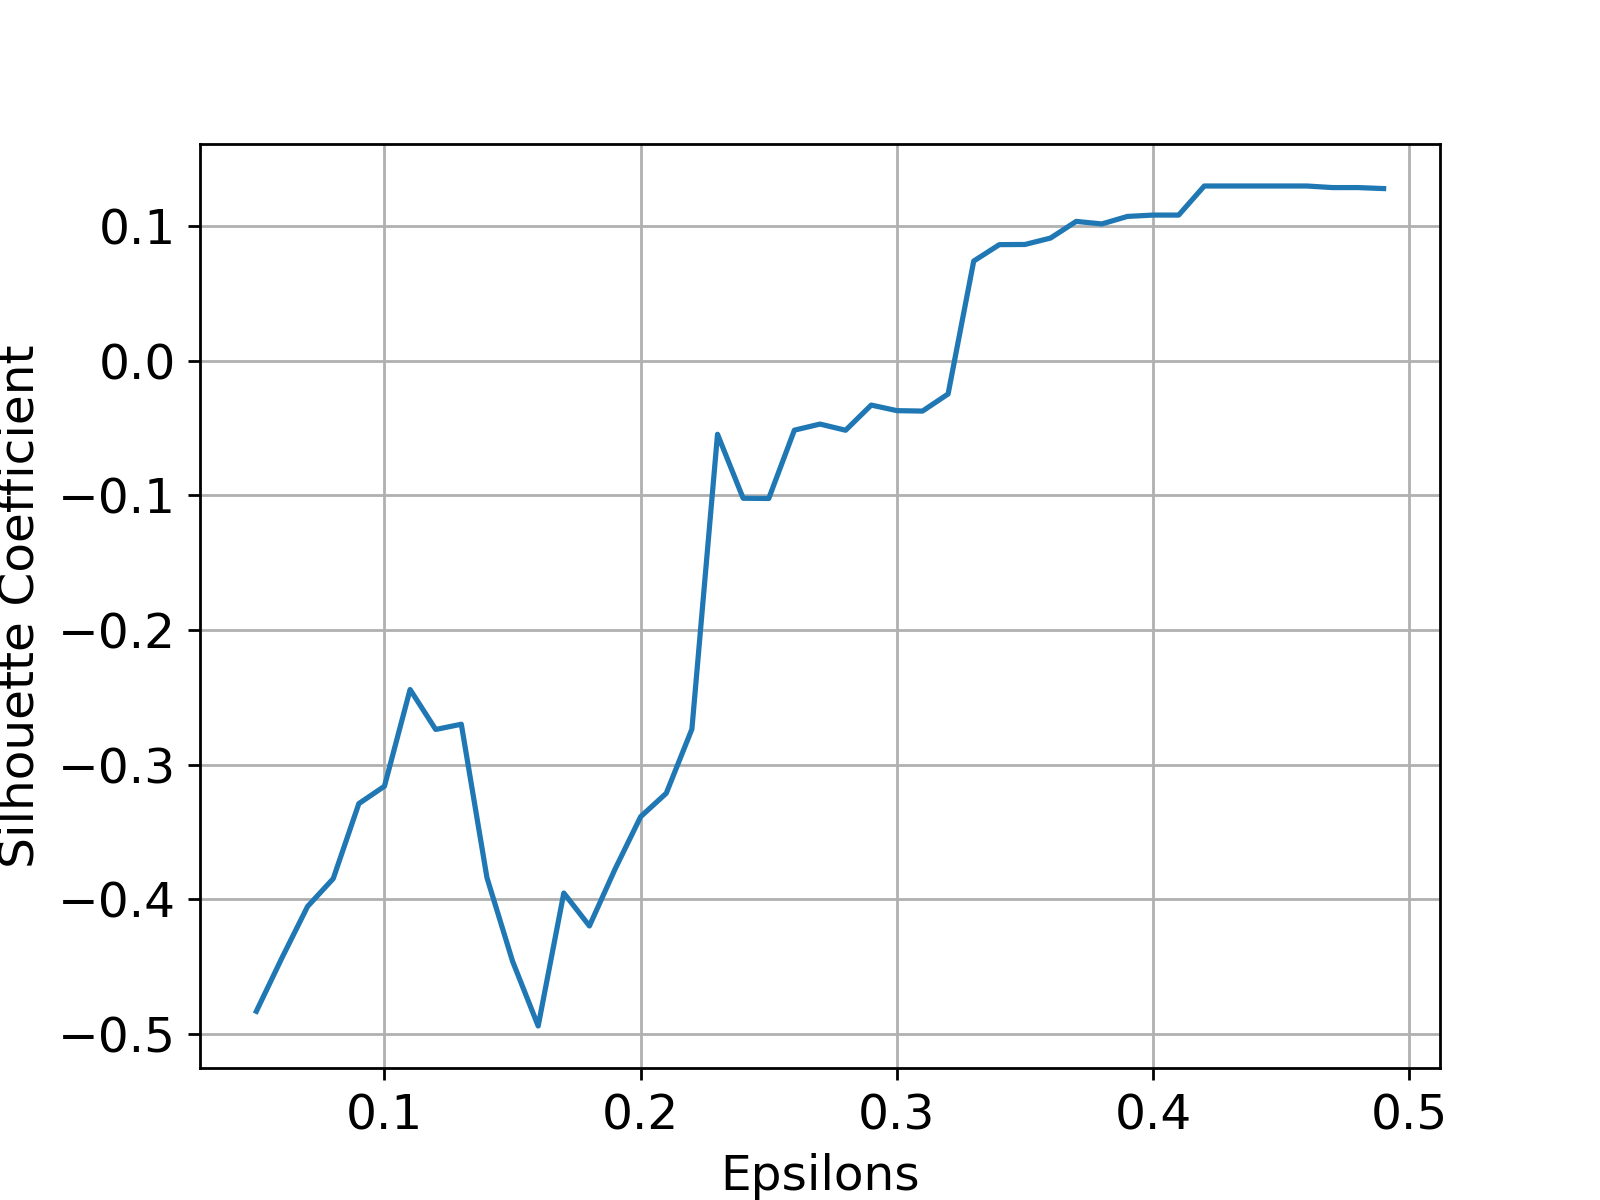

In [57]:
# plot the results
plt.figure()
plt.plot(epsilons, scores)
plt.xlabel('Epsilons')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [107]:
# import data
heart = pd.read_csv('C:/Users/erinp/Desktop/mlnn/data/Heart.csv')

# remove non-numeric columns
heart = heart.drop(['Unnamed: 0', 'ChestPain', 'Thal'], axis=1)
heart.dropna(inplace=True)
heart.head()

Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
0   63    1     145   233    1        2    150      0      2.3      3  0.0   
1   67    1     160   286    0        2    108      1      1.5      2  3.0   
2   67    1     120   229    0        2    129      1      2.6      2  2.0   
3   37    1     130   250    0        0    187      0      3.5      3  0.0   
4   41    0     130   204    0        2    172      0      1.4      1  0.0   

   AHD  
0   No  
1  Yes  
2  Yes  
3   No  
4   No

In [108]:
X = heart.drop('AHD', axis = 1).values
X

array([[ 63. ,   1. , 145. , ...,   2.3,   3. ,   0. ],
       [ 67. ,   1. , 160. , ...,   1.5,   2. ,   3. ],
       [ 67. ,   1. , 120. , ...,   2.6,   2. ,   2. ],
       ...,
       [ 68. ,   1. , 144. , ...,   3.4,   2. ,   2. ],
       [ 57. ,   1. , 130. , ...,   1.2,   2. ,   1. ],
       [ 57. ,   0. , 130. , ...,   0. ,   2. ,   1. ]])

In [114]:
heart['num_AHD'] = np.where(heart['AHD'] =='Yes',1,0)

heart['num_AHD']

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num_AHD, Length: 299, dtype: int32

In [117]:
y = heart['num_AHD'].to_numpy()
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

<IPython.core.display.Javascript object>


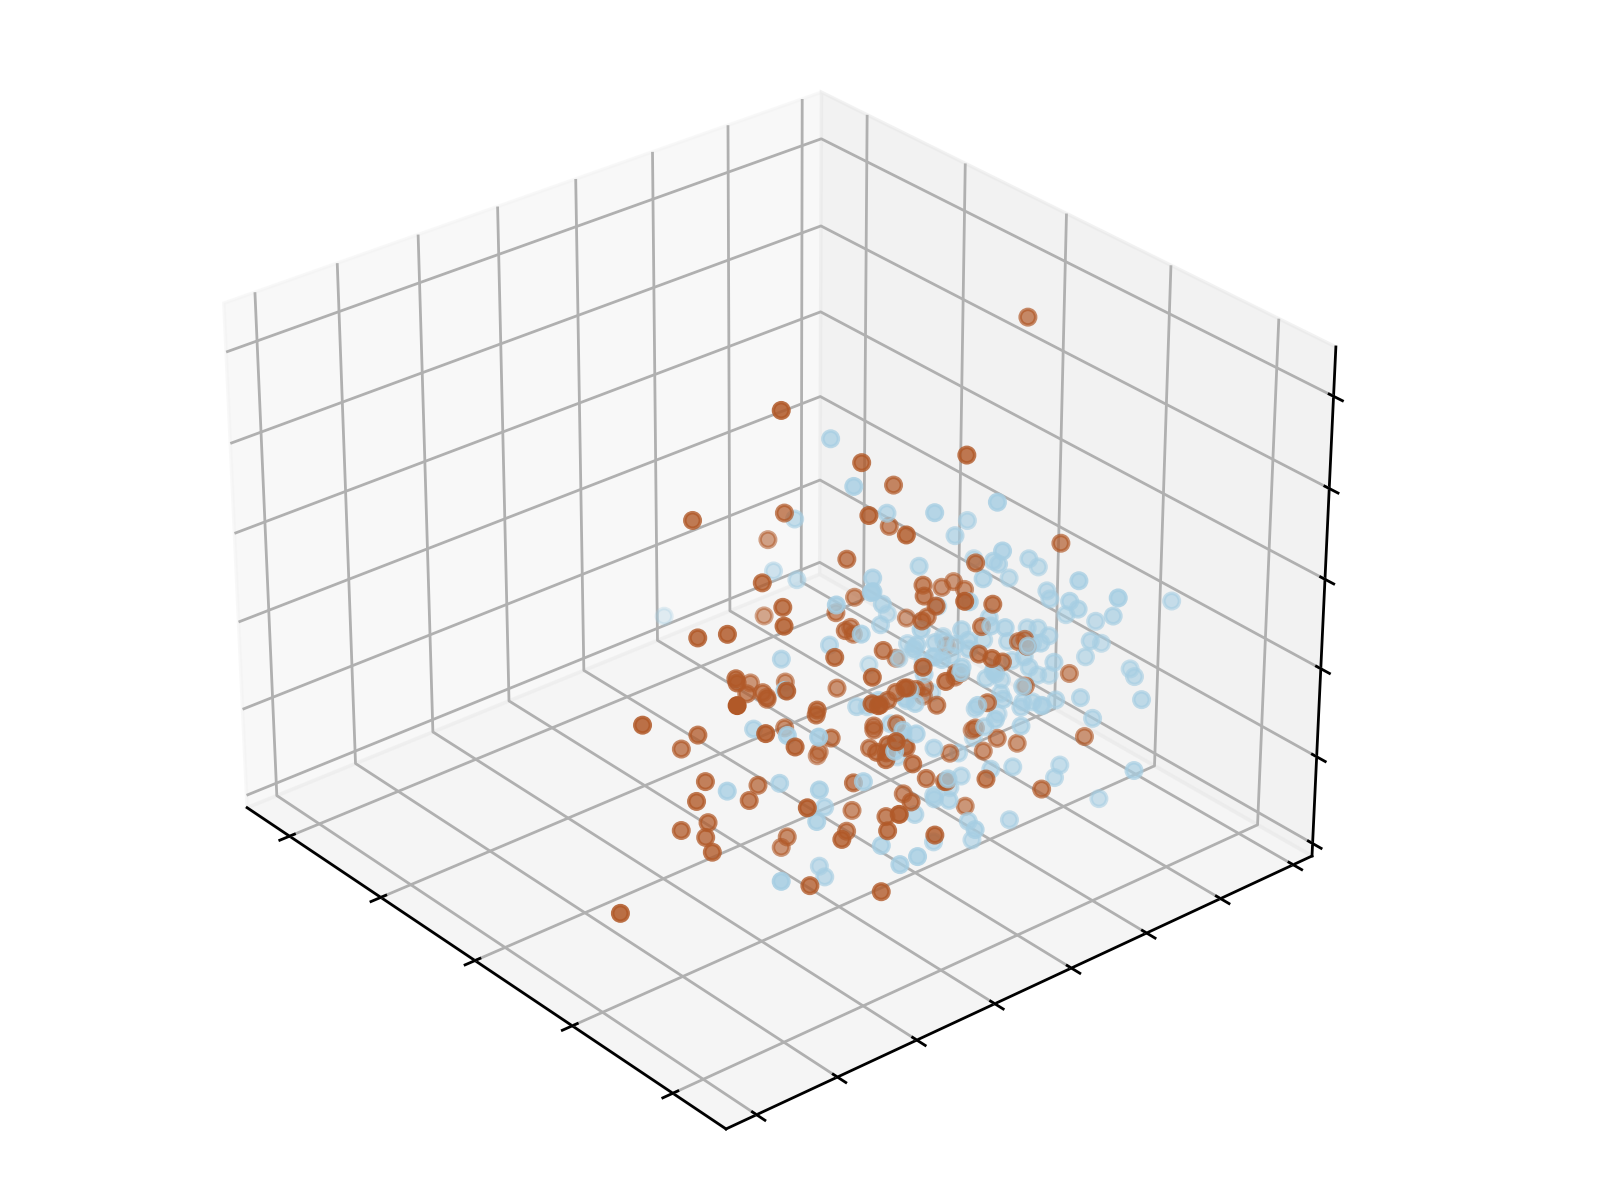

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\4205349684.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [121]:
# use PCA to condense data
from sklearn import decomposition

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [106]:
X

array([[-1.30687885e+01,  2.75699493e+00,  1.50225577e+01],
       [ 4.07790701e+01,  4.55044484e+01,  2.15430436e+01],
       [-1.81795443e+01,  2.12601170e+01, -1.16428610e+01],
       [ 2.12817670e+00, -3.99635117e+01,  1.13030577e+00],
       [-4.36136015e+01, -2.40342008e+01,  2.11532484e+00],
       [-1.16485718e+01, -2.87576113e+01, -6.74341938e+00],
       [ 2.15664321e+01, -8.17047668e+00,  9.44477462e+00],
       [ 1.06161500e+02, -1.54817638e+01, -1.51983345e+01],
       [ 7.11982267e+00,  3.70973009e+00, -1.27093958e+00],
       [-4.36390214e+01, -4.07126895e+00,  1.11957213e+01],
       [-5.44730334e+01,  3.55768559e+00,  1.13100159e+01],
       [ 4.72887378e+01, -2.83121198e+00,  6.25296220e+00],
       [ 8.85874911e+00,  7.30035275e+00, -2.96410321e+00],
       [ 1.48532354e+01, -2.64057287e+01, -1.04596631e+01],
       [-4.60350178e+01, -7.52432395e+00,  4.35905996e+01],
       [-7.79257922e+01, -2.03877363e+01,  2.60207387e+01],
       [-1.94396806e+01, -2.14368140e+01

In [137]:
# DBSCAN on PCA output
dbscan = DBSCAN(eps=.75)
y_dbscan = dbscan.fit_predict(X)
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

<IPython.core.display.Javascript object>


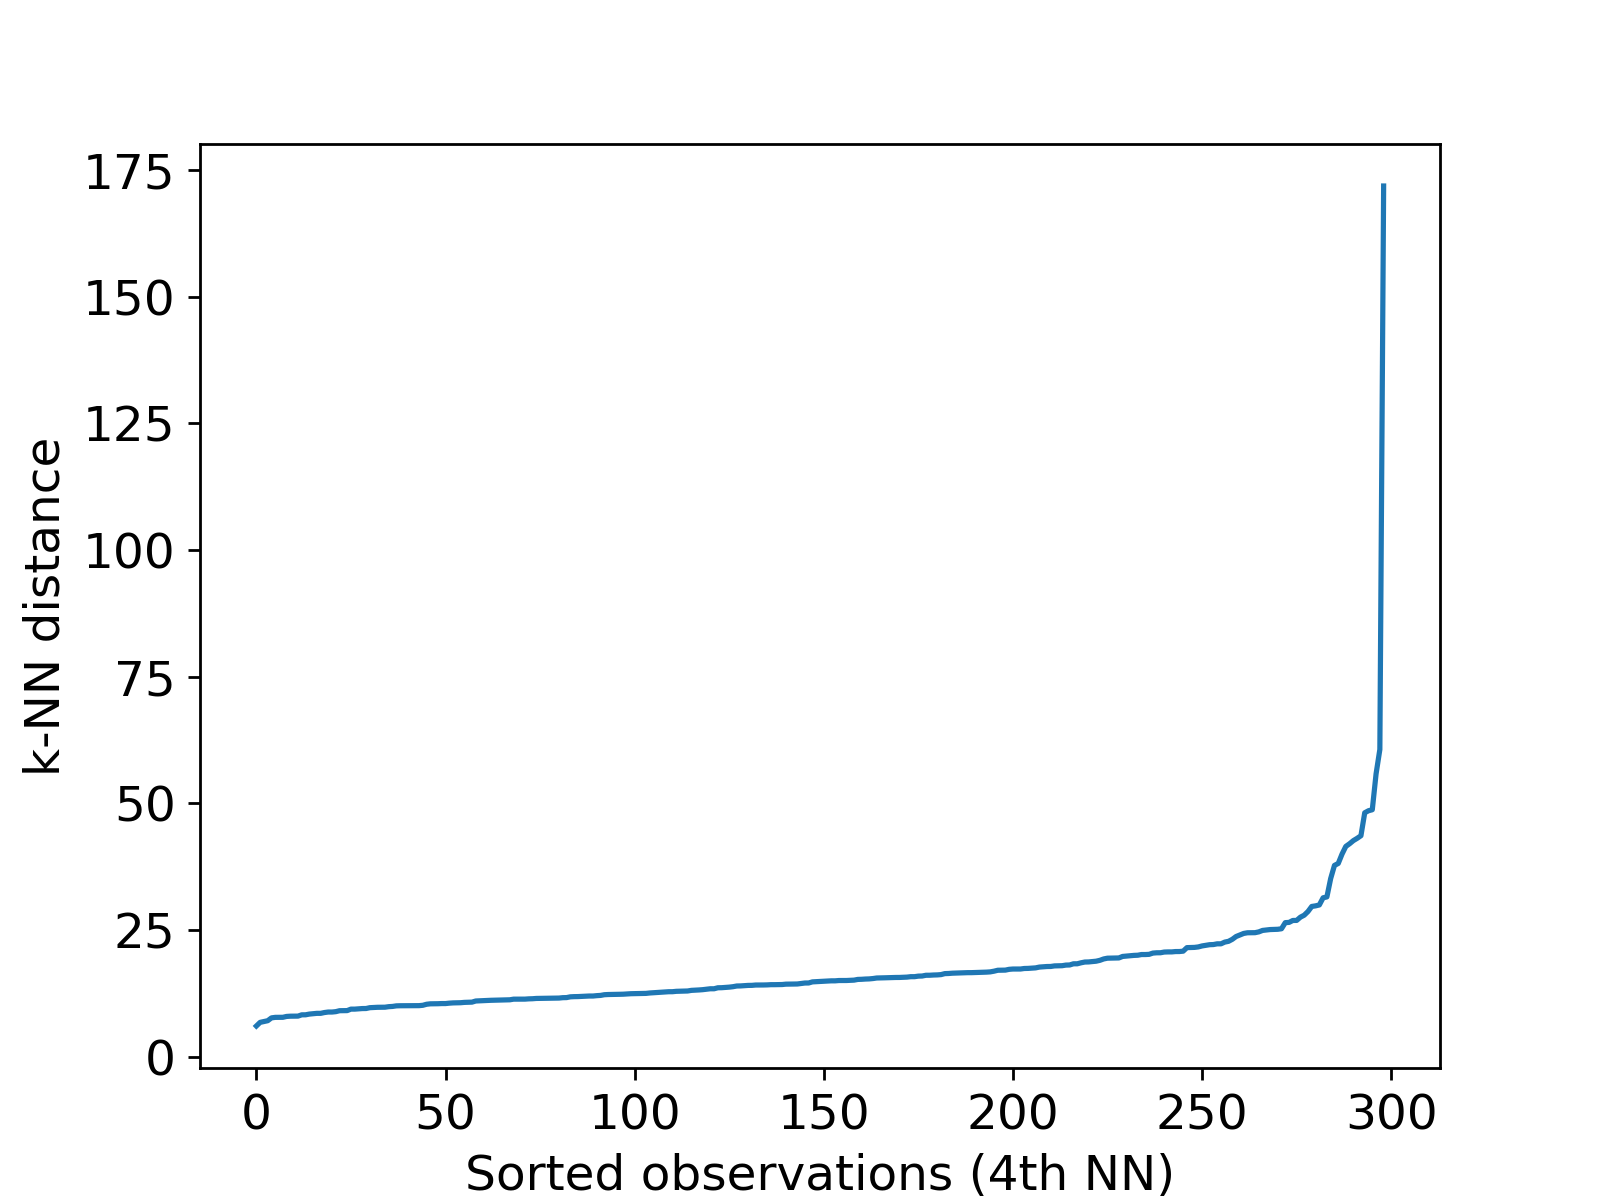

In [154]:
# to figure out an optimal epsilon, can use nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [145]:
# get estimate of knee point to optimize epsilon
!pip install --upgrade kneed
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)


48.15845634995296


In [173]:
# try dbscan again with eps = 48.15
# started with min_samples = 6 (2 * number of dimensions, since we reduced the dimensions to 3 using PCA)
dbscan = DBSCAN(eps=48.15, min_samples =6)
y_dbscan = dbscan.fit_predict(X)
y_dbscan

# I experimented with the number of min_samples and compared the resulting plot against the original plot 


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

<IPython.core.display.Javascript object>


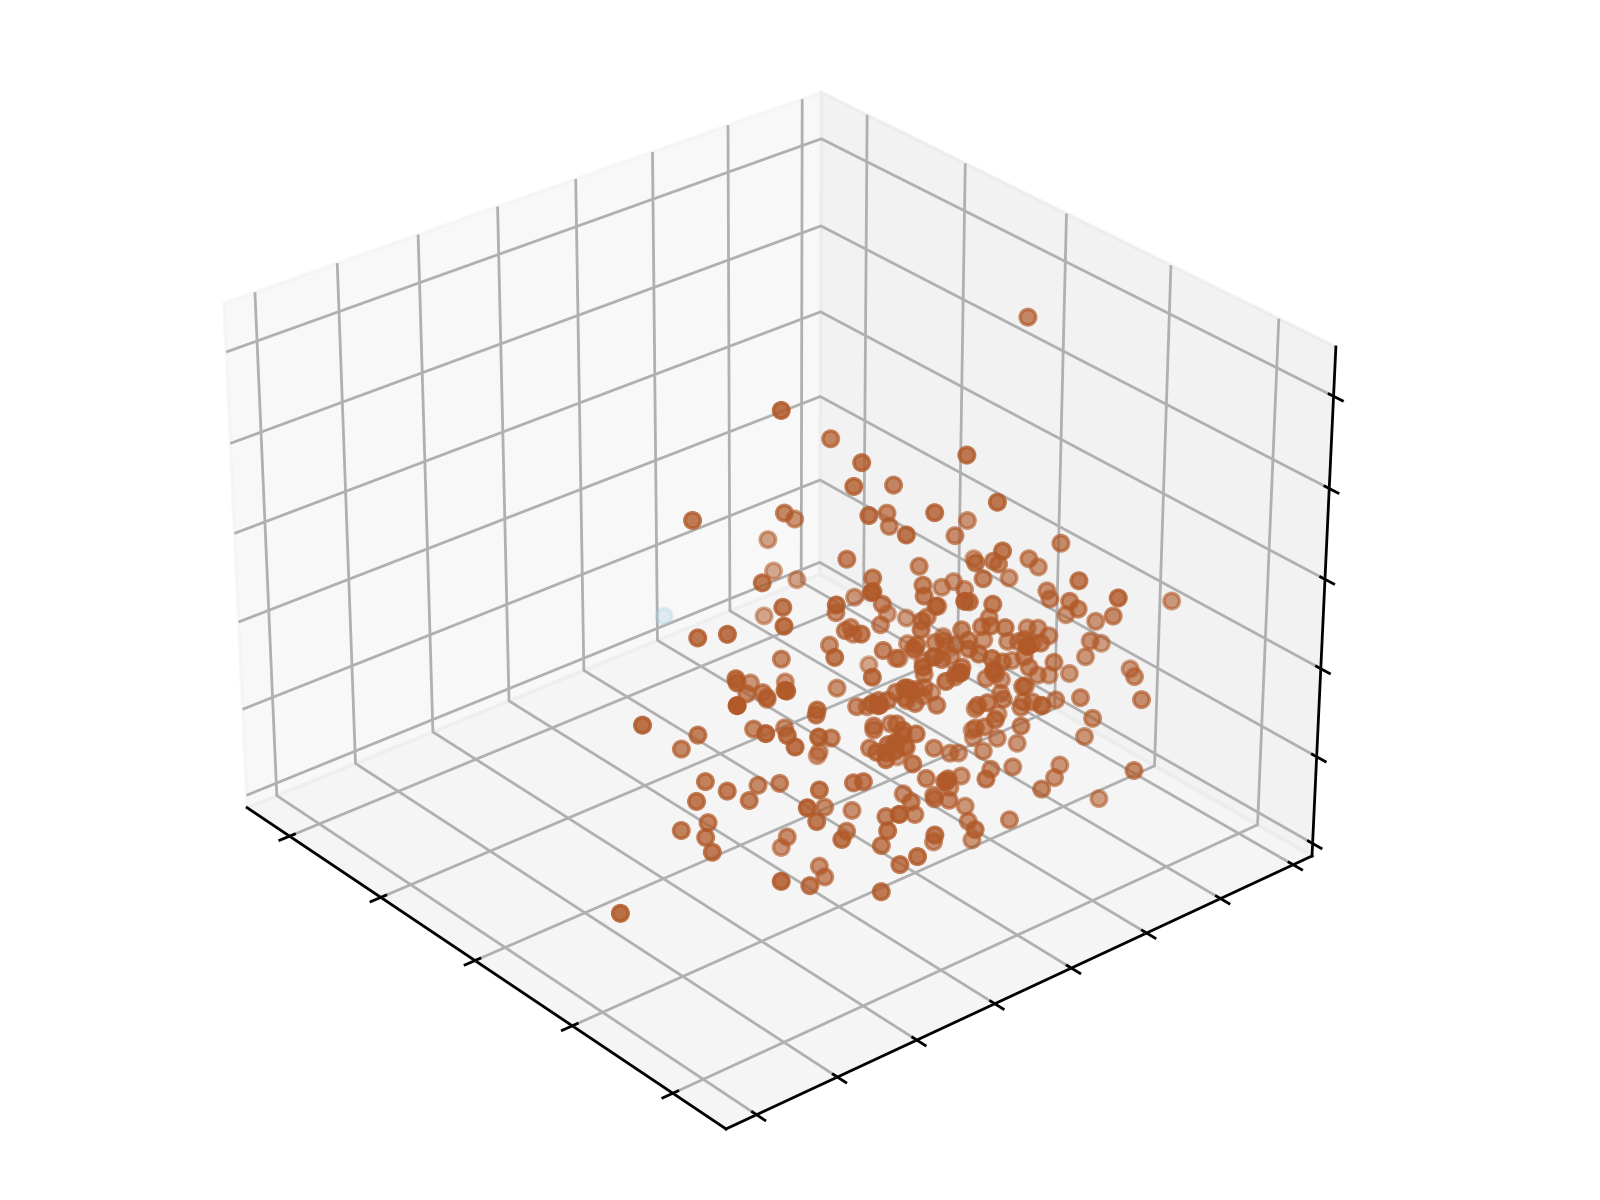

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\2573007795.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [174]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


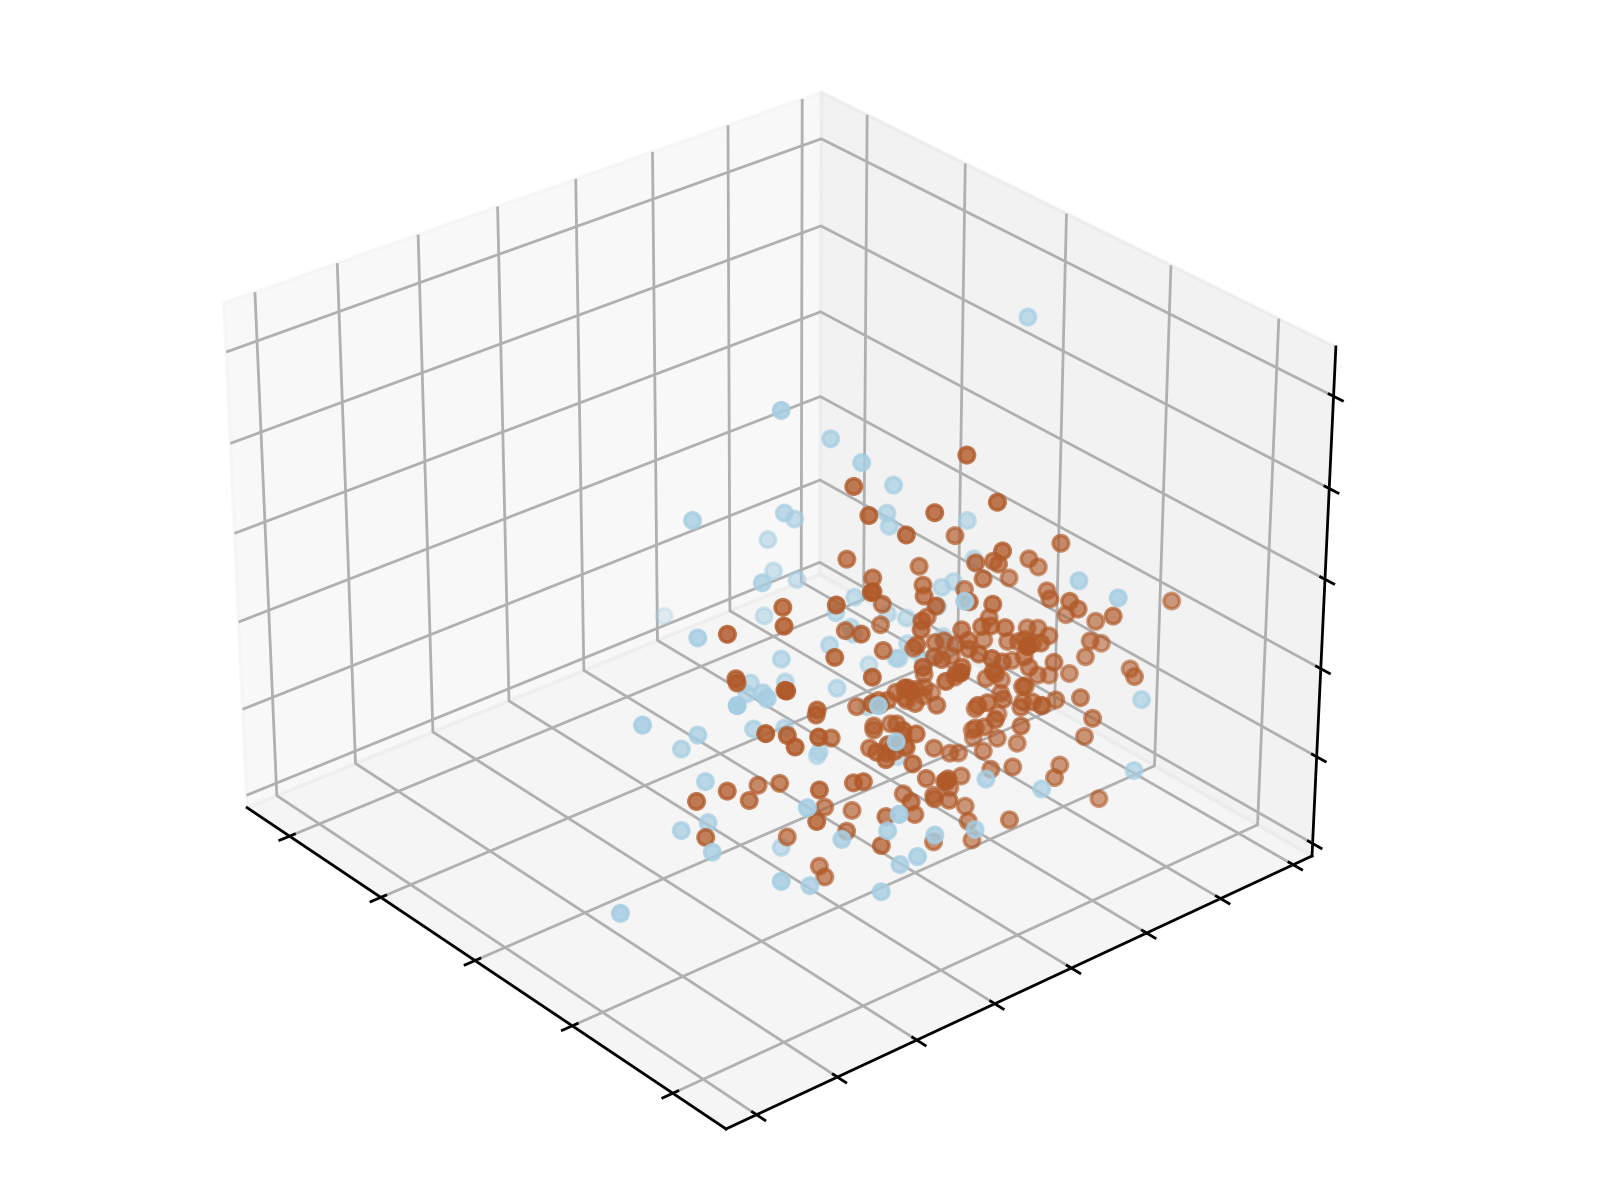

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\1619823031.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [175]:
# try dbscan again with eps = 48.15, min_samples = 150
# upped the number of min_samples, resulting in a closer visual match to the original plot

dbscan = DBSCAN(eps=48.15, min_samples =150)
y_dbscan = dbscan.fit_predict(X)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

The light blue dots represent what the model is detecting as random noise. 

In [176]:
# using adjusted rand score to measure similarity of actual and predicted y values
metrics.adjusted_rand_score(y, y_dbscan)

0.04072014451602755

Given that the rand score is much closer to 0 than 1, this doesn't seem like a very good model.

Note: While the model didn't produce very interesting cluster patterns, it might be  function of the underlying data.

In [177]:
# try normalizing data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = heart.drop('AHD', axis = 1).values
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.94067407,  0.69296322,  0.75419084, ...,  2.26765706,
        -0.71830622, -0.9258201 ],
       [ 1.38482969,  0.69296322,  1.60279745, ...,  0.64557701,
         2.48726932,  1.08012345],
       [ 1.38482969,  0.69296322, -0.6601535 , ...,  0.64557701,
         1.41874414,  1.08012345],
       ...,
       [ 1.49586859,  0.69296322,  0.69761707, ...,  0.64557701,
         1.41874414,  1.08012345],
       [ 0.27444064,  0.69296322, -0.09441576, ...,  0.64557701,
         0.35021896,  1.08012345],
       [ 0.27444064, -1.44307804, -0.09441576, ...,  0.64557701,
         0.35021896,  1.08012345]])

<IPython.core.display.Javascript object>


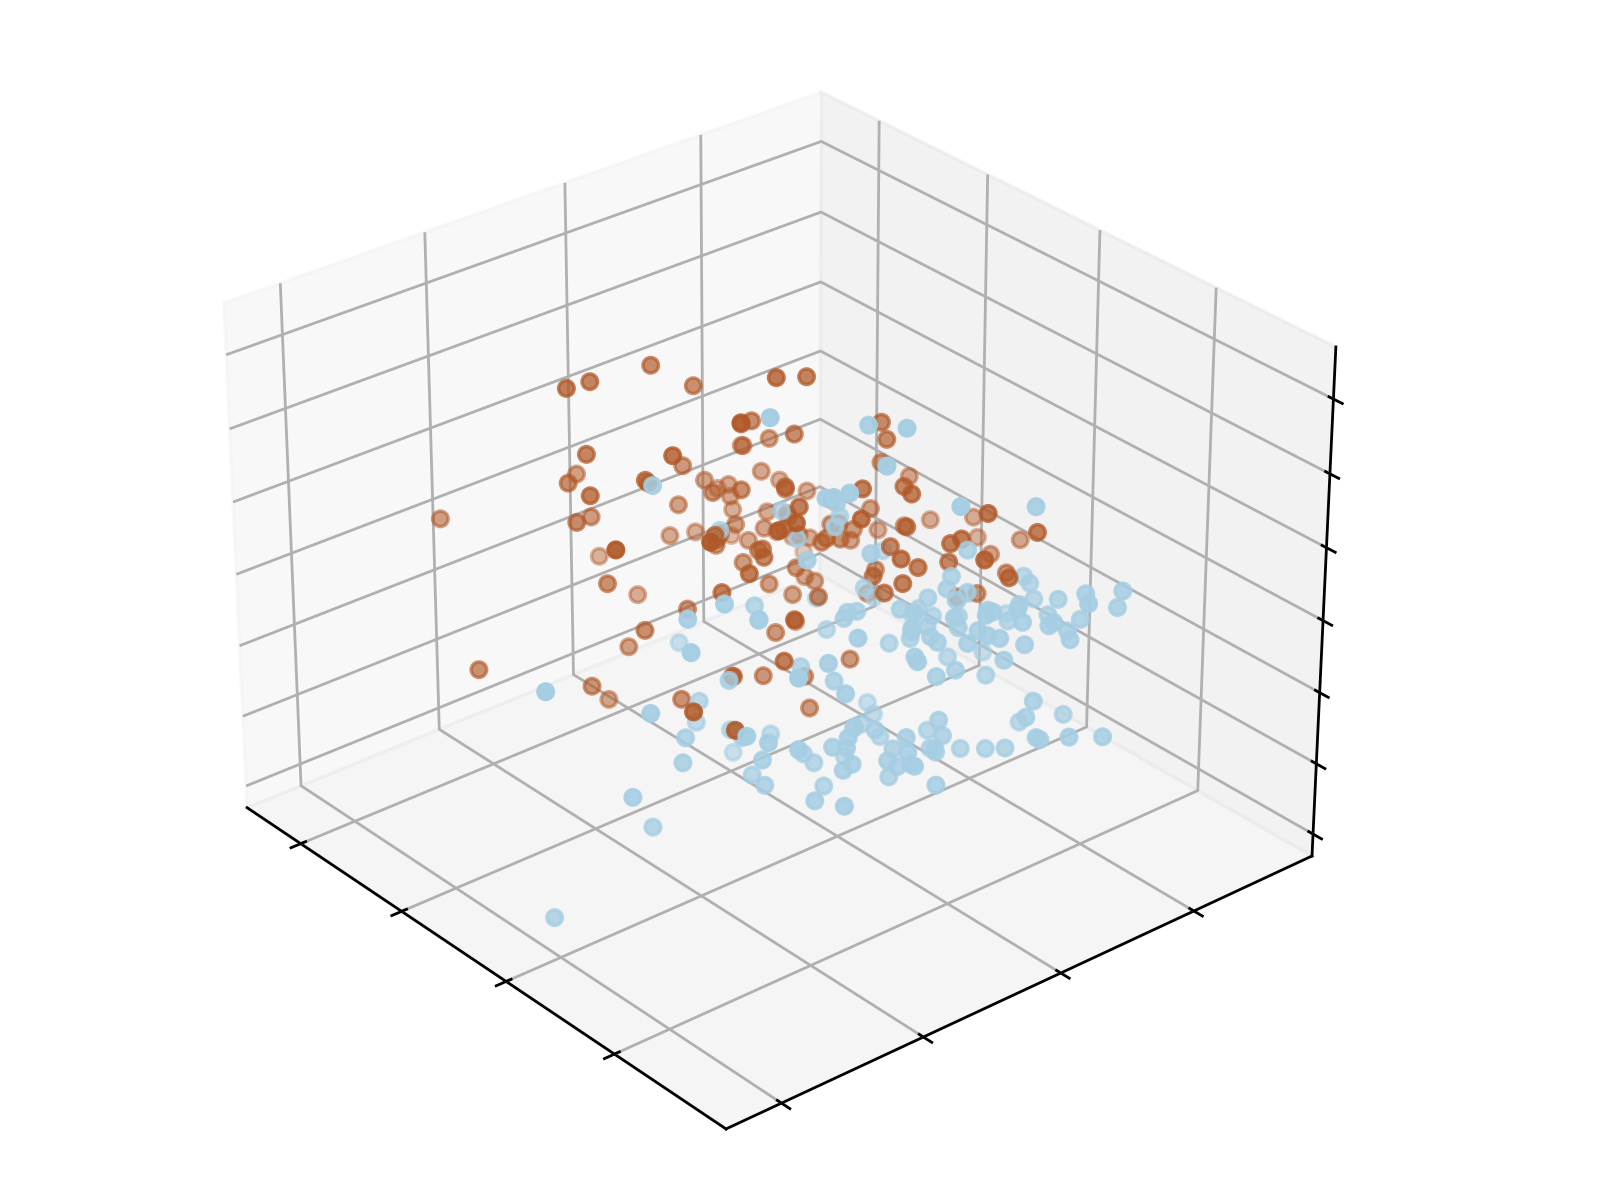

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\1581946191.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [178]:
# use PCA to condense data

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X_scaled)
X_scaled = pca.transform(X_scaled)

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


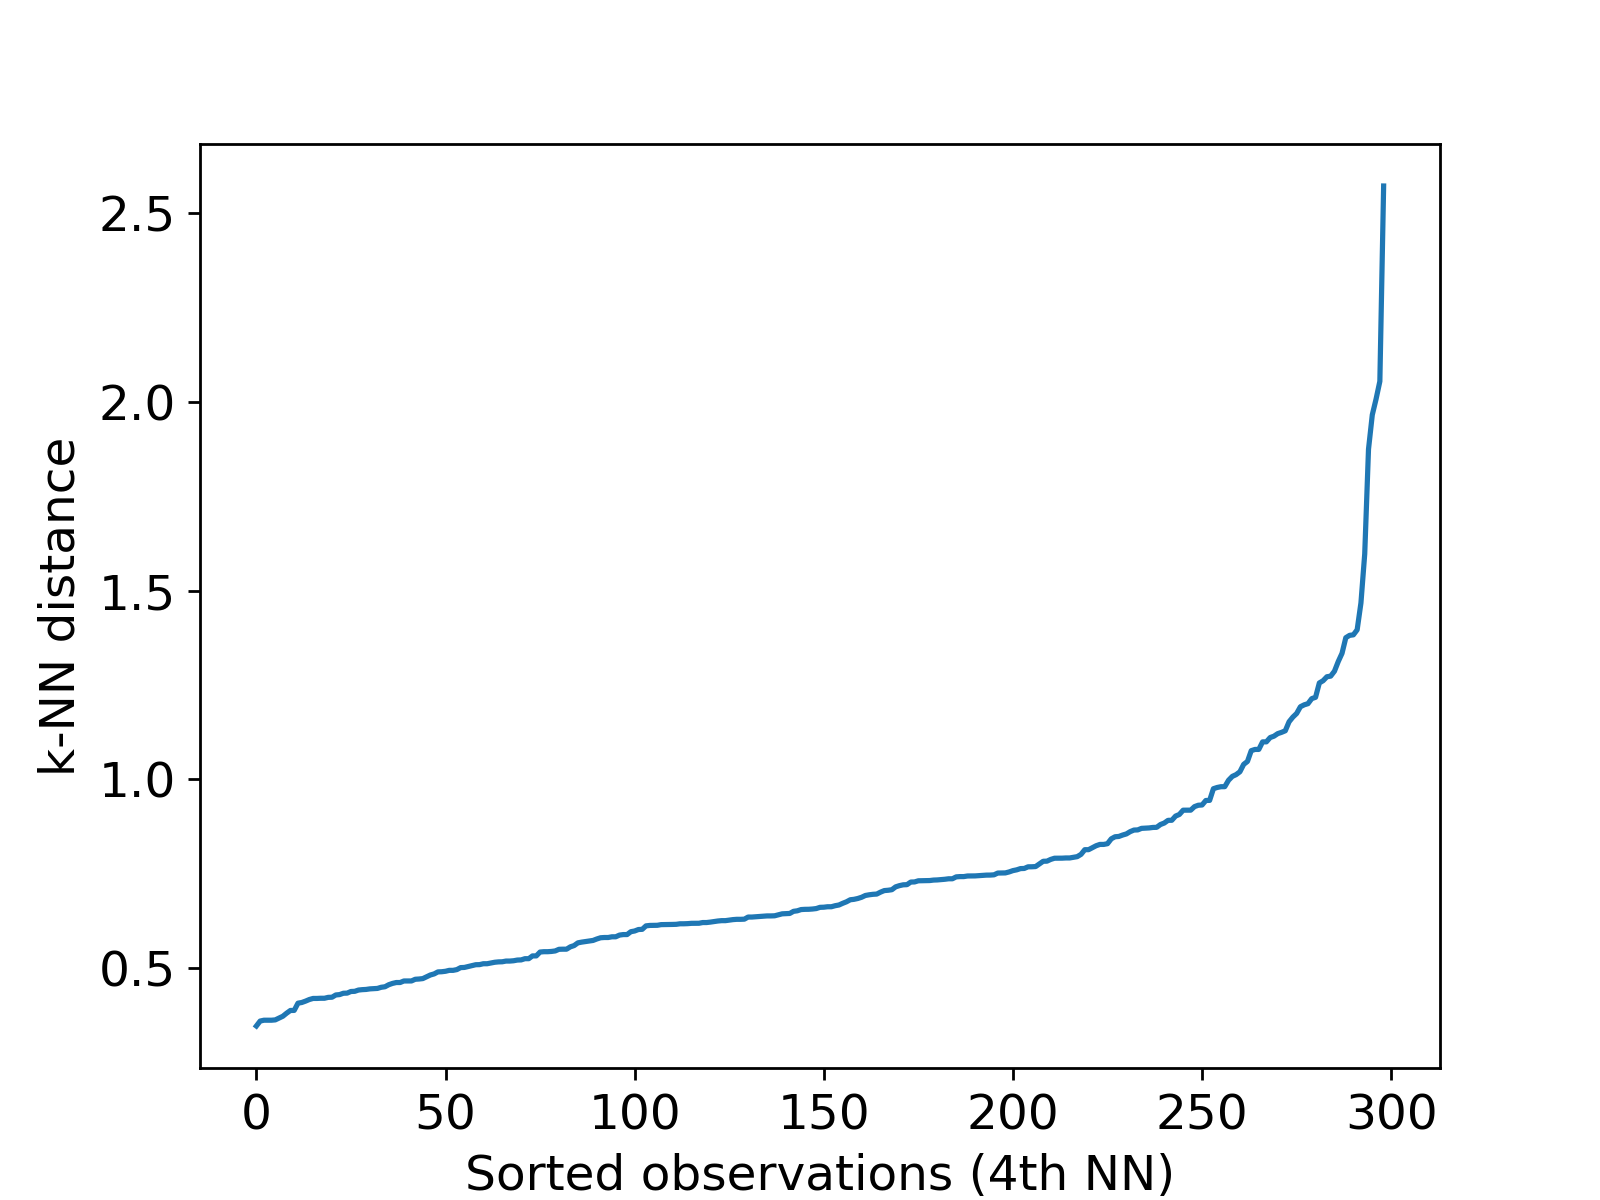

In [179]:
# to figure out an optimal epsilon, can use nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_scaled)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_scaled)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [180]:
# get estimate of knee point to optimize epsilon
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)


1.375259683077162


<IPython.core.display.Javascript object>


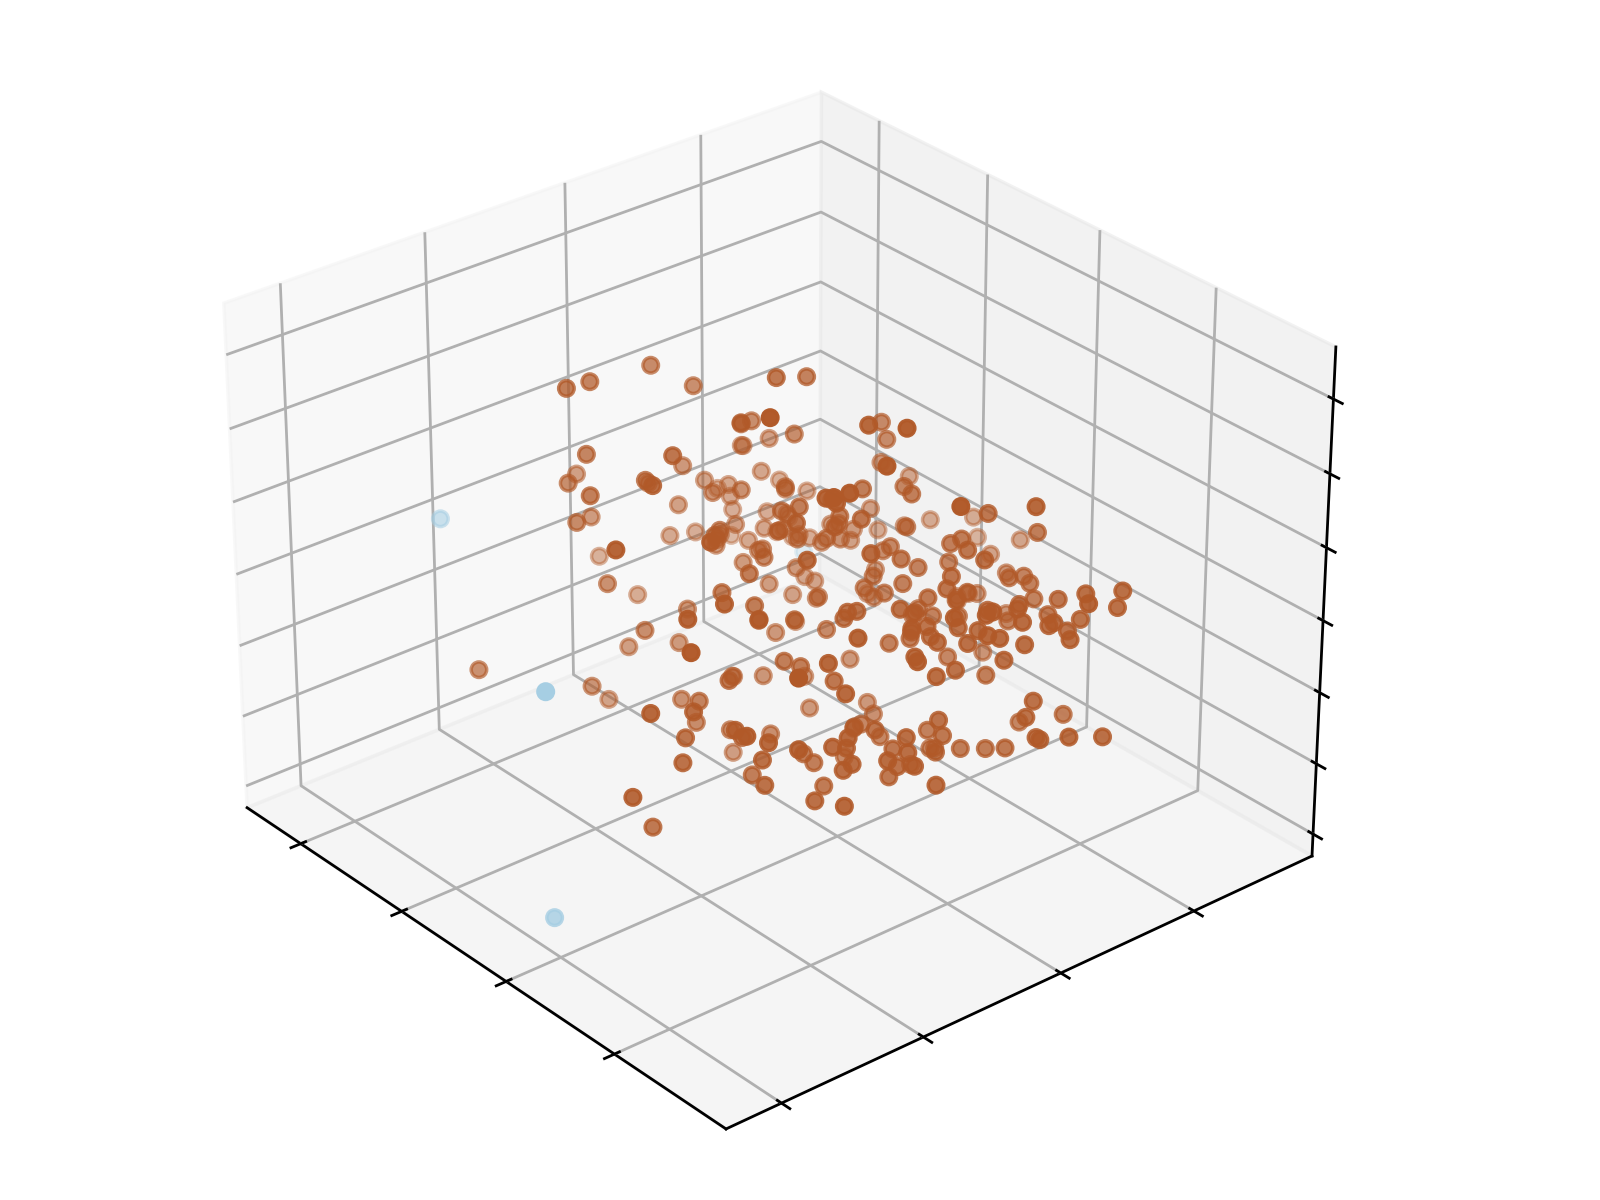

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\3814088164.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [181]:
# try dbscan with eps = 1.38, min_samples = 6
# min_samples = 2 * number of dimensions to start

dbscan = DBSCAN(eps=1.38, min_samples =6)
y_dbscan = dbscan.fit_predict(X_scaled)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


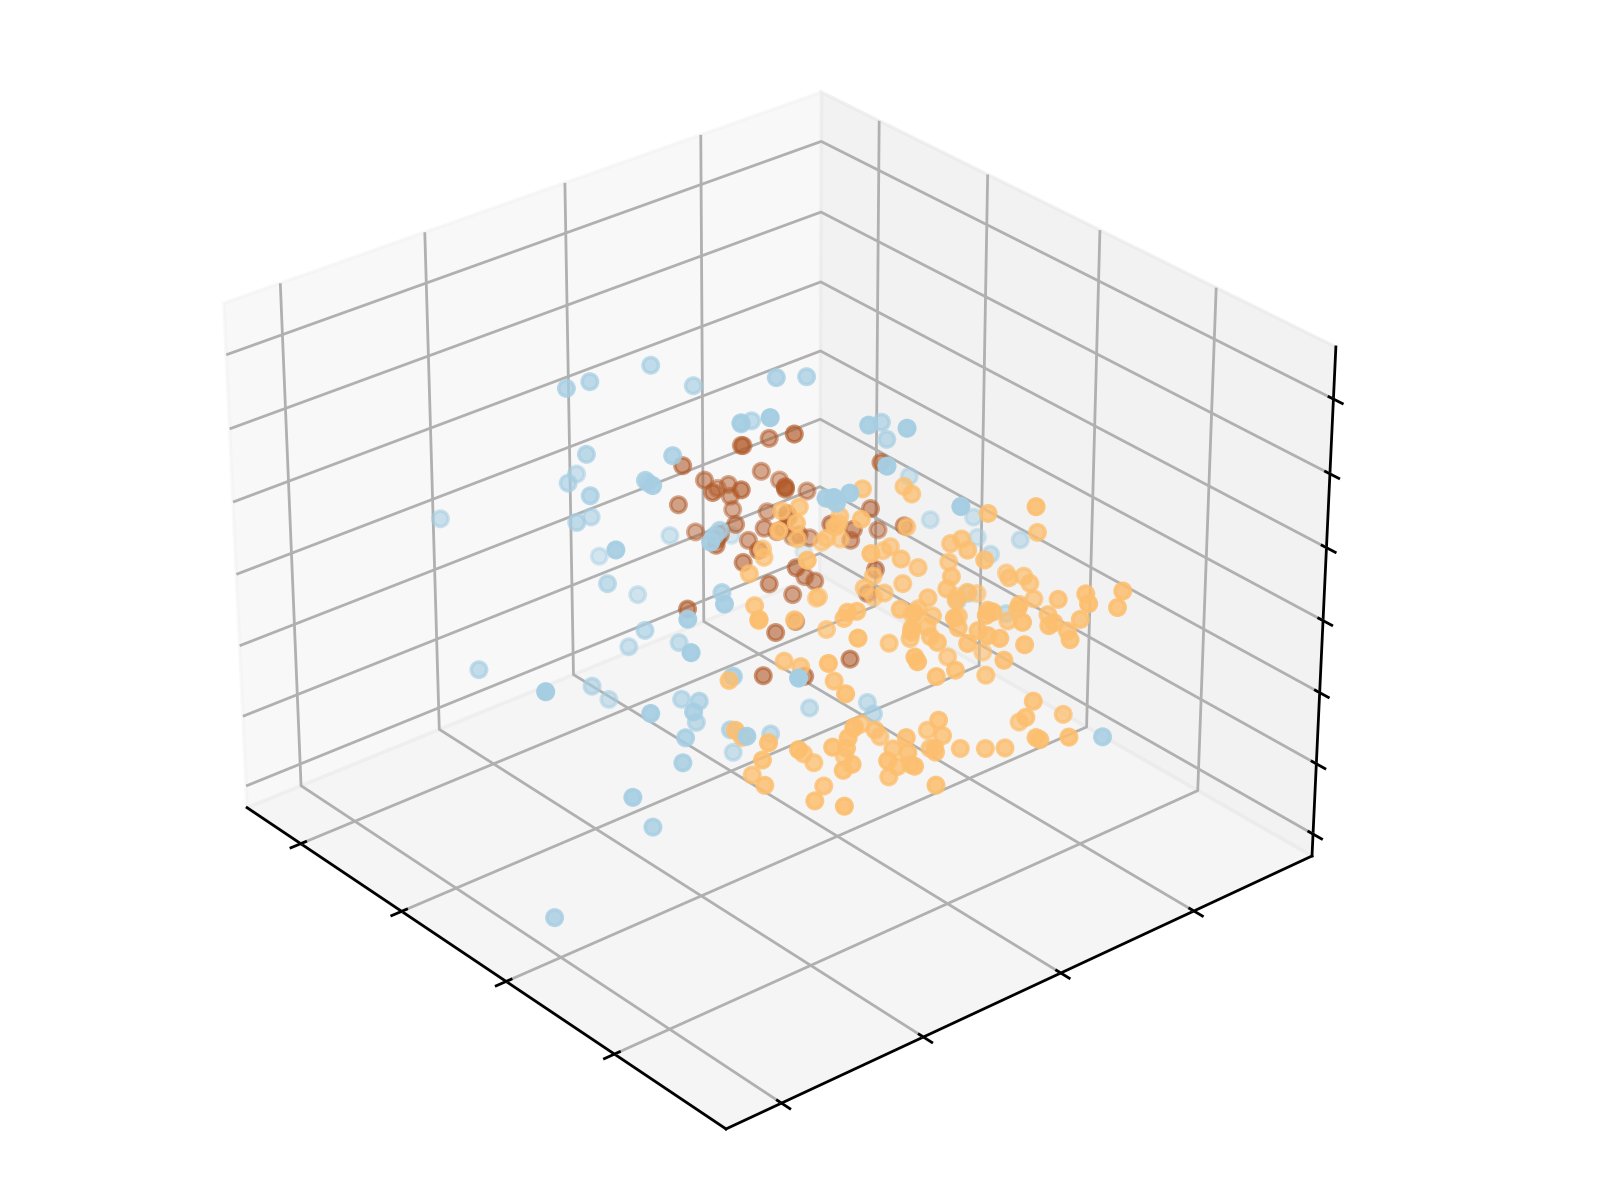

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\4094030719.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [188]:
# try dbscan with eps = 1.38, min_samples = 45
# upped min_samples

dbscan = DBSCAN(eps=1.38, min_samples =45)
y_dbscan = dbscan.fit_predict(X_scaled)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [189]:
# using adjusted rand score to measure similarity of actual and predicted y values
metrics.adjusted_rand_score(y, y_dbscan)

0.24404128387386492

This is definitely better than the first run - data must be normalized before the PCA. Let's see if it can be closer to one by fine tuning the min_samples.

<IPython.core.display.Javascript object>


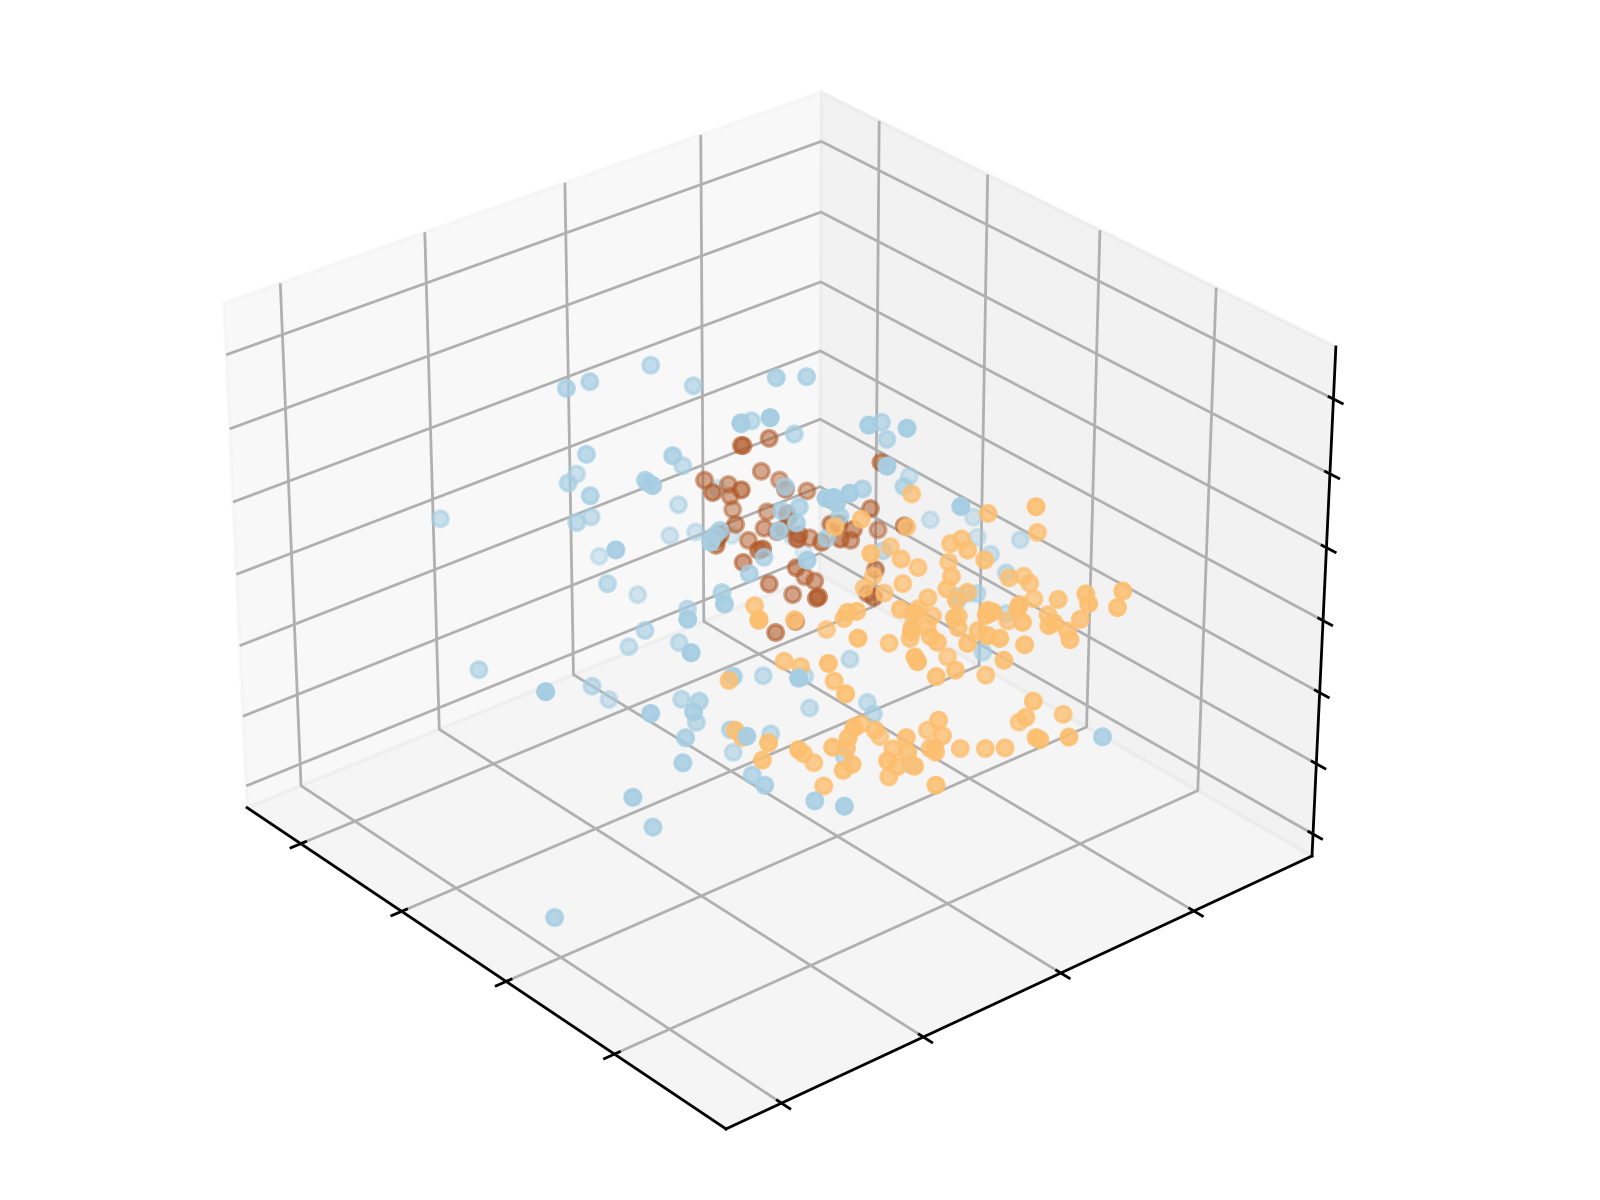

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\681006239.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [193]:
# try dbscan with eps = 1.38, min_samples = 51
# upped min_samples

dbscan = DBSCAN(eps=1.38, min_samples =51)
y_dbscan = dbscan.fit_predict(X_scaled)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [194]:
# using adjusted rand score to measure similarity of actual and predicted y values
metrics.adjusted_rand_score(y, y_dbscan)

0.24681061795690606

The adjusted rand score indictes min_samples = 51 is better at matching true y values than min_samples = 45.

<IPython.core.display.Javascript object>


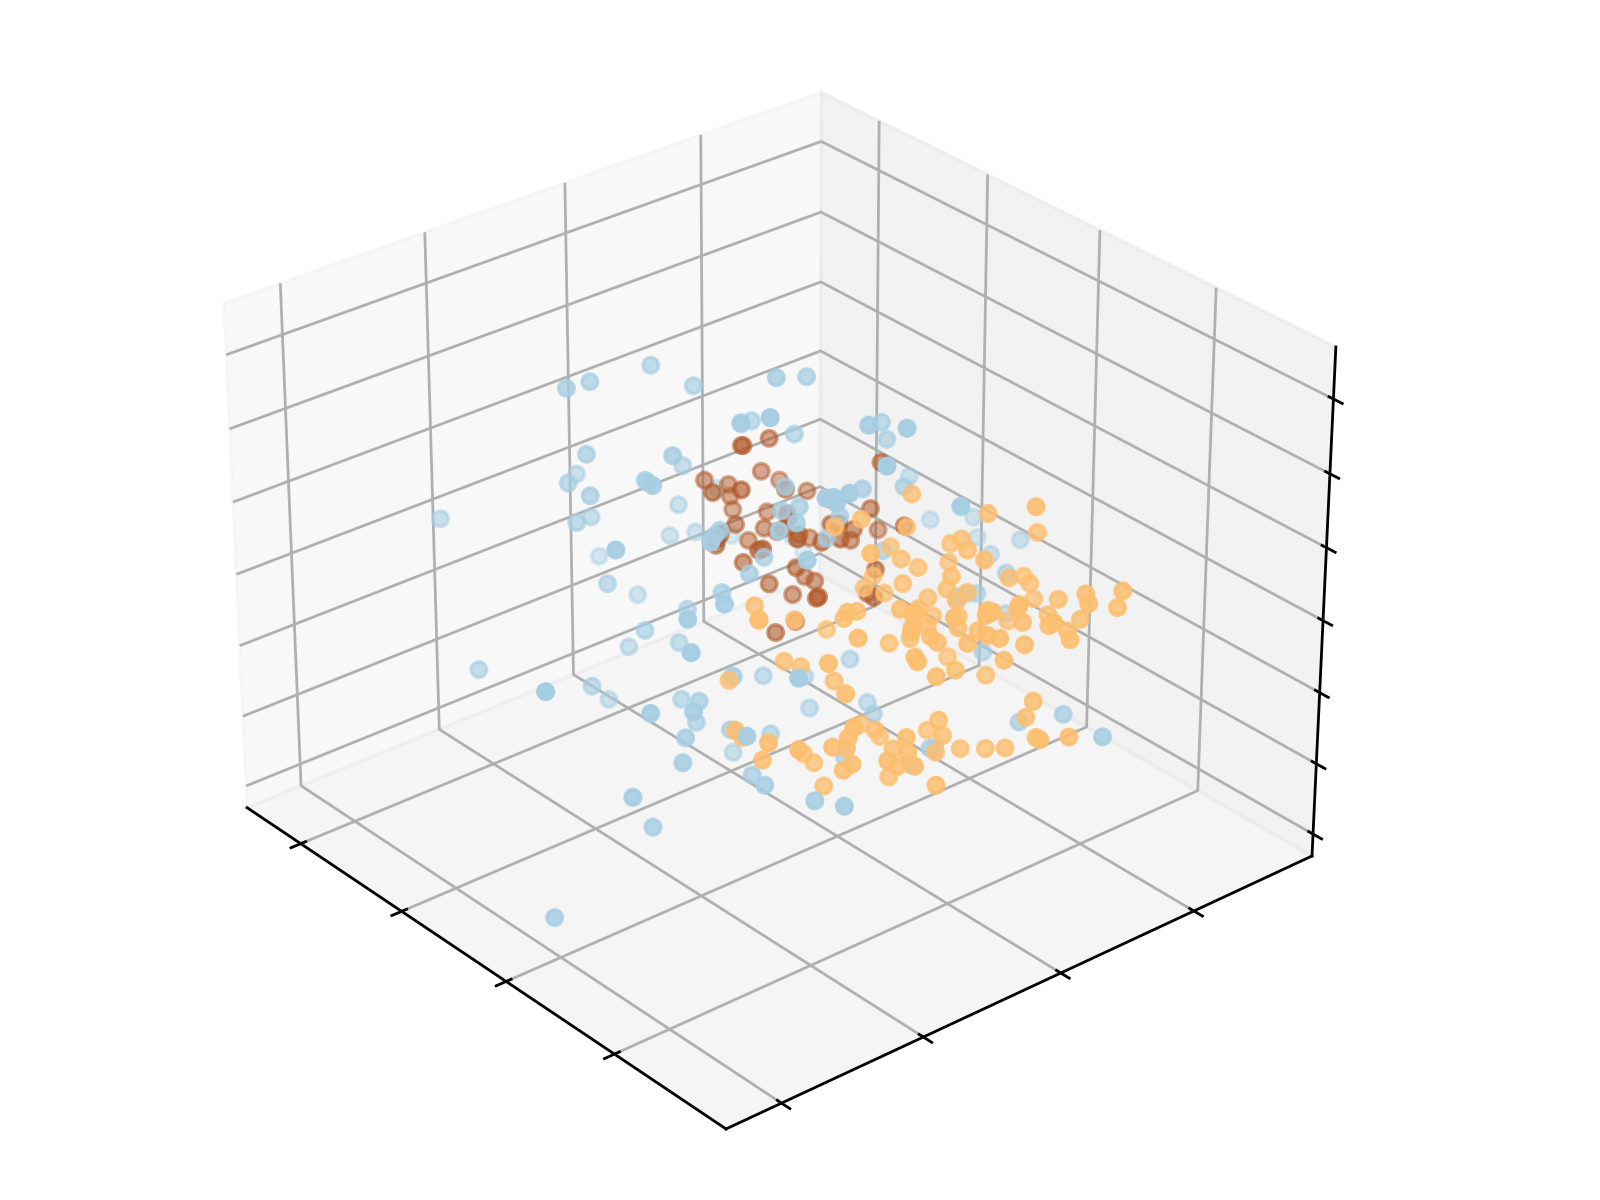

C:\Users\erinp\AppData\Local\Temp\ipykernel_28244\347317583.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)


In [195]:
# try dbscan with eps = 1.38, min_samples = 52
# upped min_samples

dbscan = DBSCAN(eps=1.38, min_samples =52)
y_dbscan = dbscan.fit_predict(X_scaled)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=29, azim=140)

plt.cla()

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_dbscan, cmap="Paired")


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [196]:
# using adjusted rand score to measure similarity of actual and predicted y values
metrics.adjusted_rand_score(y, y_dbscan)

0.22671670655555418

The rand score dropped when I changed the min_samples from 51 to 52. 

Note: While I could have only included the optimal model in the code, I left them in to illustrate the thought process and fine tuning. 